# Time series analysis

In [1]:
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('wd_10-07-2020_09-07-2021.csv', index_col="timestamp_string", parse_dates=True)
df.index.names = ['Date']
df.head()

,ID,weekday,timestamp,nb_imp,price,win,seconds_notif
Date,,,,,,,
2020-07-10 06:00:00,1,4,1.594354e+09,2,2,True,116
2020-07-10 06:00:01,2,4,1.594354e+09,2,2,True,486
2020-07-10 06:00:01,3,4,1.594354e+09,0,0,False,676
2020-07-10 06:00:02,4,4,1.594354e+09,7,7,True,227
2020-07-10 06:00:03,5,4,1.594354e+09,5,5,True,204


In [41]:
df2 = df.groupby([df.index.date, df.weekday, df.index.hour]).size().reset_index()

In [42]:
df2.columns = ['date', 'weekday','hour','nb_br']

In [43]:
df2

,date,weekday,hour,nb_br
0,2020-07-10,4,6,380
1,2020-07-10,4,7,131
2,2020-07-10,4,8,64
3,2020-07-10,4,9,179
4,2020-07-10,4,10,45
...,...,...,...,...
5105,2021-07-09,4,15,25
5106,2021-07-09,4,16,30
5107,2021-07-09,4,17,39
5108,2021-07-09,4,18,62


In [70]:
mask = df2[(df2.weekday == 0)]

In [71]:
pattern = mask.pivot_table('nb_br', index = mask.hour, columns=mask.date)

In [72]:
pattern.shape

(14, 52)

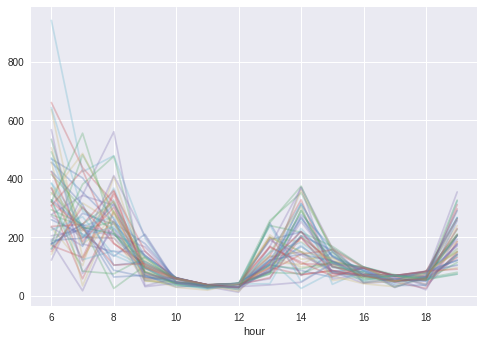

In [73]:
pattern.plot(legend=False, alpha=0.3)

In [53]:
df3 = df2.nb_br.groupby([df2.weekday, df2.hour]).mean().reset_index()

In [54]:
df3

,weekday,hour,nb_br
0,0,6,345.615385
1,0,7,245.173077
2,0,8,254.173077
3,0,9,101.269231
4,0,10,52.096154
...,...,...,...
93,6,15,228.519231
94,6,16,260.557692
95,6,17,231.750000
96,6,18,159.442308


In [108]:
pivoted = df3.pivot_table('nb_br', index = df3.hour, columns=df3.weekday)

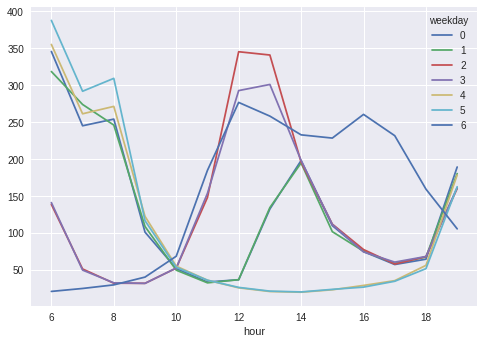

In [109]:
plt.style.use('seaborn')
pivoted.plot()

Faisons un tableau de pourcentage

In [110]:
line, col = pivoted.shape

In [111]:
for i in range(col):
    pivoted.iloc[:,i] = pivoted.iloc[:,i]*100/pivoted.iloc[:,i].sum()

In [112]:
pivoted

weekday,0,1,2,3,4,5,6
hour,,,,,,,
6,18.222006,16.932969,7.650638,8.158777,23.796521,24.778141,0.994957
7,12.926350,14.564357,2.838909,2.885448,17.512389,18.654588,1.182361
8,13.400860,13.082058,1.776704,1.891424,18.182393,19.768185,1.411409
9,5.339255,5.791190,1.768223,1.848109,8.215767,7.465769,1.906624
10,2.746685,2.651782,2.902515,3.046491,3.709041,3.441579,3.234743
11,1.785497,1.739913,8.170080,8.880695,2.430977,2.318149,8.702934
12,1.946709,1.965836,19.034898,16.907306,1.742011,1.697436,13.028599
13,6.991929,7.151839,18.790018,17.385993,1.407008,1.374173,12.155862
14,10.447337,10.358716,10.806513,11.452942,1.343801,1.305342,10.963542


In [115]:
pivoted = pivoted.round(0).astype(int)

In [116]:
pivoted

weekday,0,1,2,3,4,5,6
hour,,,,,,,
6,18,17,8,8,24,25,1
7,13,15,3,3,18,19,1
8,13,13,2,2,18,20,1
9,5,6,2,2,8,7,2
10,3,3,3,3,4,3,3
11,2,2,8,9,2,2,9
12,2,2,19,17,2,2,13
13,7,7,19,17,1,1,12
14,10,10,11,11,1,1,11


In [122]:
pivoted.to_csv('proportion_table.csv', index=True)

### Plotting the time series

In [38]:
data = df.resample('D').count()

In [39]:
test = data.groupby([data.index.weekday,.index.hour]).mean()

In [40]:
test

,,ID,weekday,timestamp,nb_imp,price,win,seconds_notif
Date,Date,,,,,,,
0,0,1896.692308,1896.692308,1896.692308,1896.692308,1896.692308,1896.692308,1896.692308
1,0,1881.173077,1881.173077,1881.173077,1881.173077,1881.173077,1881.173077,1881.173077
2,0,1814.076923,1814.076923,1814.076923,1814.076923,1814.076923,1814.076923,1814.076923
3,0,1731.500000,1731.500000,1731.500000,1731.500000,1731.500000,1731.500000,1731.500000
4,0,1492.528302,1492.528302,1492.528302,1492.528302,1492.528302,1492.528302,1492.528302
5,0,1564.576923,1564.576923,1564.576923,1564.576923,1564.576923,1564.576923,1564.576923
6,0,2124.173077,2124.173077,2124.173077,2124.173077,2124.173077,2124.173077,2124.173077


In [22]:
by_hour = data.groupby(data.index.hour).mean()
by_hour.plot(xlim=(6,20))

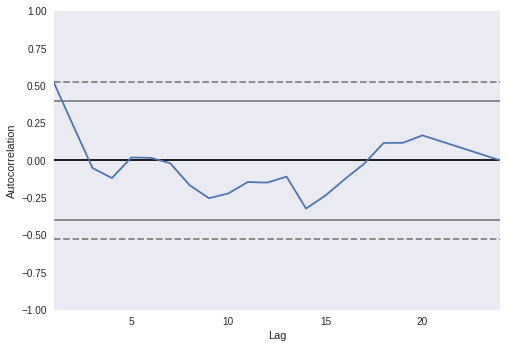

In [26]:
pd.plotting.autocorrelation_plot(by_hour)